**CS306: DATA ANALYSIS AND VISUALIZATION**
---

LAB 8: K-Means Clustering


STUDENT ID: 201801407

NAME: PRATVI SHAH

---



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,RobustScaler
from numpy import linalg as LA
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')


In [29]:
x = [10,14,8,12,15,12,15,17,5,18,22,25,35,21,39,27,25,33,30,36]
y = [8,25,10,30,35,12,14,15,22,32,2,21,35,7,15,29,33,23,17,11]

In [149]:
def find_centroids(k,n):
    random.seed(5)
    idx=[]
    for i in range(k):
        idx.append(random.randint(0,n-1))
    return idx

In [161]:
def find_distance(a,aa,b,bb):
    return (a-aa)**2 + (b-bb)**2

In [162]:
def find_clusters(x,y,cx,cy):
    k=len(cx)
    n=len(x)
    distx=[[] for _ in range(k)]
    disty=[[] for _ in range(k)]
    for i in range(n):
        d=[]
        for j in range(k):
            temp=find_distance(cx[i],x[i],cy[i],y[i])
            print(temp)
            d.append(temp)
            # d.append((cx[j] - x[i])**2 + (cy[j] - y[i])**2)
        location=d.index(min(d))
        
        del d
        distx[location].append(x[i])
        disty[location].append(y[i])
    return distx,disty

In [163]:
def find_inertia(cx,cy,dx,dy):
    ans=0
    for i in range(len(cx)):
        for j in range(len(dx[i])):
            ans+=find_distance(cx[i],dx[i][j],cy[i],dy[i][j])
    return ans

In [211]:
def k_means(x,y,k,plot):
    # clr= iter(['b', 'r','c', 'm', 'g', 'tab:orange', 'tab:brown', 'tab:pink'])
    n=len(x)
    idx=find_centroids(k,n)

    #indices of centroid
    cx=[x[idx[i]] for i in range(k)]
    cy=[y[idx[i]] for i in range(k)]
    cx_prev=[x[idx[i]]-1 for i in range(k)]
    cy_prev=[y[idx[i]]-1 for i in range(k)]
    distx=[[] for _ in range(k)]
    disty=[[] for _ in range(k)]
    itr=0
    flag=False
    while flag==False and itr!=150:
        
        #k clusters with elements in the cluster
        distx,disty=find_distances(x,y,cx,cy)
            
        #store previous centroids
        for i in range(k):
            cx_prev[i]=cx[i]
            cy_prev[i]=cy[i]

        #finding the new centroids
        for i in range(k):
            cx[i]=np.mean(distx[i])
            cy[i]=np.mean(disty[i])
        
        count=0
        for i in range(k):
            if cx[i]==cx_prev[i] and cy[i]==cy_prev[i]:
                count+=1
        if count==k:
            break
        itr+=1


    if plot==True:
        plt.figure(figsize=[10,6])
        for i in range(k):
            sns.scatterplot(distx[i],disty[i],markers='o',s=200)#,c=next(clr))
        sns.scatterplot(cx,cy,color='.2',marker='*',s=200)
        plt.grid()
        plt.xlabel('X',fontsize=15)
        plt.ylabel('Y',fontsize=15)

    return cx,cy,distx,disty


In [198]:
inertia=[]
for i in range(1,n):
    cx,cy,distx,disty=k_means(x,y,i,False)
    inertia.append(find_inertia(cx,cy,distx,disty))

Text(0.5, 1.0, 'Elbow Curve')

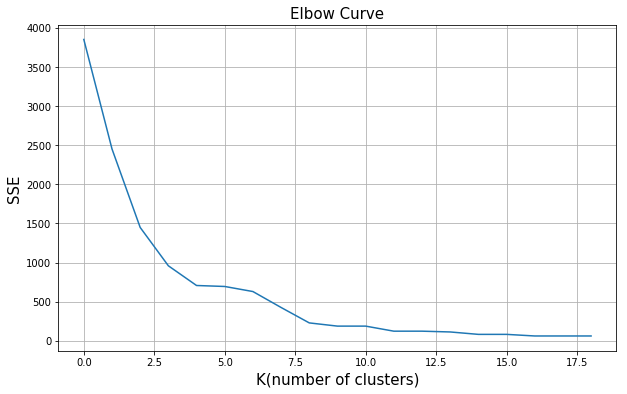

In [199]:
plt.figure(figsize=[10,6])
plt.plot(inertia)
plt.grid()
plt.ylabel('SSE',fontsize=15)
plt.xlabel('K(number of clusters)',fontsize=15)
plt.title('Elbow Curve',fontsize=15)

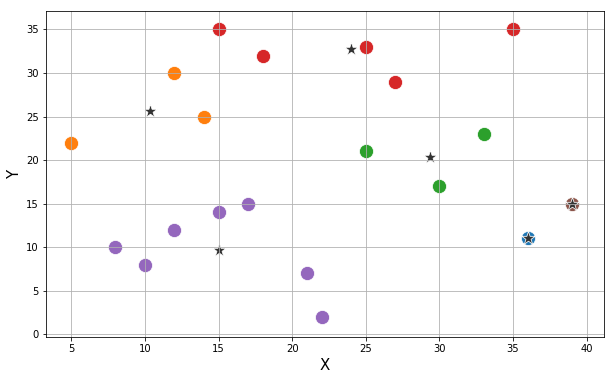

In [212]:
cx,cy,distx,disty=k_means(x,y,6,True)
